0.9994305968284607
0.0763070285320282
0.058948758989572525


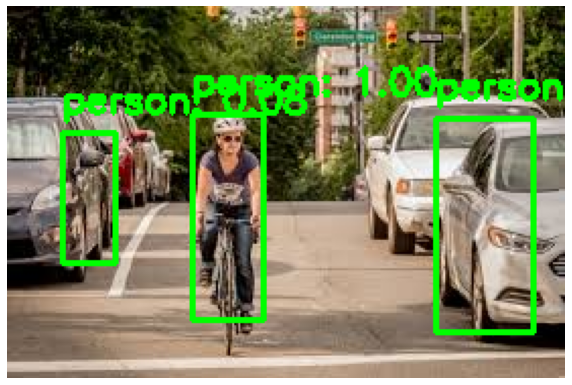

In [22]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a pre-trained Keypoint R-CNN model
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set to evaluation mode

# Load the class names from COCO (these are from the COCO dataset)
COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'nothing', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'nothing', 'backpack', 'umbrella', 'nothing', 
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 
    'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 
    'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Load an image
img_path = 'image5.jpg'
img = cv2.imread(img_path) 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for the model
img_tensor = torchvision.transforms.functional.to_tensor(img_rgb)  # Convert to tensor

# Perform inference
with torch.no_grad():
    predictions = model([img_tensor])

# Extract the results for each detected object
for i, prediction in enumerate(predictions[0]['boxes']):
    # Confidence score
    score = predictions[0]['scores'][i].item()
    print(score)

    # Filter out low-confidence detections (e.g., below 0.2)
    if score > 0:
        # Bounding box
        box = prediction.numpy().astype(int)
        x1, y1, x2, y2 = box

        # Get the class label
        class_id = predictions[0]['labels'][i].item()
        class_name = COCO_CLASSES[class_id]  # Get the class name from the COCO_CLASSES list

        # Draw the bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box with thickness of 2
        
        # Add label and confidence score above the bounding box
        label = f"{class_name}: {score:.2f}"
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display the result
cv2.imshow('Detection Results', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Show the result using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


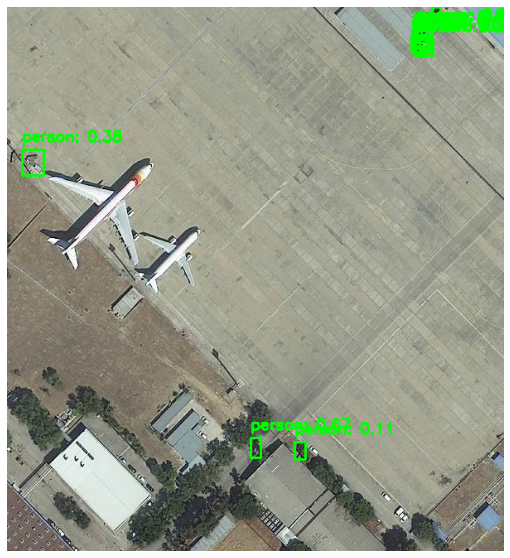

In [23]:
# Load an image
img_path = 'plane.jpg'
img = cv2.imread(img_path) 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for the model
img_tensor = torchvision.transforms.functional.to_tensor(img_rgb)  # Convert to tensor

# Perform inference
with torch.no_grad():
    predictions = model([img_tensor])

# Extract the results for each detected object
for i, prediction in enumerate(predictions[0]['boxes']):
    # Confidence score
    score = predictions[0]['scores'][i].item()

    # Filter out low-confidence detections (e.g., below 0.2)
    if score > 0.1:
        # Bounding box
        box = prediction.numpy().astype(int)
        x1, y1, x2, y2 = box

        # Get the class label
        class_id = predictions[0]['labels'][i].item()
        class_name = COCO_CLASSES[class_id]  # Get the class name from the COCO_CLASSES list

        # Draw the bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box with thickness of 2
        
        # Add label and confidence score above the bounding box
        label = f"{class_name}: {score:.2f}"
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display the result
cv2.imshow('Detection Results', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Show the result using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [17]:
import torch
from PIL import Image
import os
import numpy as np
import torchvision.transforms as T  # Assuming you're using torchvision transforms

# Function to calculate IoU (Intersection over Union)
def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    unionArea = boxAArea + boxBArea - interArea
    
    iou = interArea / unionArea
    return iou

# Paths
image_dir = r'C:\Users\LENOVO\Practices\val\images'  # Folder containing original images
label_dir = r'C:\Users\LENOVO\Practices\val\labels'  # Folder containing label files

# Load your pre-trained model
model.eval()  # Set model to evaluation mode

# IoU threshold for determining a "true positive"
iou_threshold = 0.7

# For calculating precision and recall
total_true_positives = 0
total_false_positives = 0
total_false_negatives = 0

# Get all image filenames (assuming they have corresponding label files)
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

# Process each image
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    label_path = os.path.join(label_dir, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))

    # Load image
    image = Image.open(image_path).convert('RGB')

    # Ground truth annotations (from label file)
    true_boxes = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                cls_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:])
                
                # Convert from YOLO format (x_center, y_center, width, height) to (x1, y1, x2, y2)
                x1 = (x_center - width / 2) * image.width
                y1 = (y_center - height / 2) * image.height
                x2 = (x_center + width / 2) * image.width
                y2 = (y_center + height / 2) * image.height
                
                true_boxes.append([x1, y1, x2, y2])

    # Transform the image
    image_tensor = T.ToTensor()(image).unsqueeze(0)

    # Model predictions
    with torch.no_grad():
        predictions = model(image_tensor)

    pred_boxes = predictions[0]['boxes'].cpu().numpy()  # Predicted bounding boxes
    pred_scores = predictions[0]['scores'].cpu().numpy()  # Prediction confidence scores

    # Filter out predictions with low scores (e.g., below 0.5 confidence)
    score_threshold = 0.7
    pred_boxes = pred_boxes[pred_scores > score_threshold]

    # Match predicted boxes to ground truth boxes using IoU
    matched_true_boxes = set()  # To track ground truth boxes that have been matched
    true_positives = 0
    false_positives = 0

    for pred_box in pred_boxes:
        best_iou = 0
        best_gt_box = None

        # Find the ground truth box with the highest IoU for this prediction
        for i, true_box in enumerate(true_boxes):
            iou = calculate_iou(pred_box, true_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_box = i
        
        # If IoU is above the threshold, count as a true positive, else false positive
        if best_iou >= iou_threshold and best_gt_box not in matched_true_boxes:
            true_positives += 1
            matched_true_boxes.add(best_gt_box)  # Mark the ground truth box as matched
        else:
            false_positives += 1

    # Count false negatives: ground truth boxes that were not matched
    false_negatives = len(true_boxes) - len(matched_true_boxes)

    total_true_positives += true_positives
    total_false_positives += false_positives
    total_false_negatives += false_negatives

    print(f"Processed image: {image_file} - True Positives: {true_positives}, False Positives: {false_positives}, False Negatives: {false_negatives}")

# Calculate Precision and Recall
precision = total_true_positives / (total_true_positives + total_false_positives) if (total_true_positives + total_false_positives) > 0 else 0
recall = total_true_positives / (total_true_positives + total_false_negatives) if (total_true_positives + total_false_negatives) > 0 else 0

print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")


Processed image: frame_0399.jpg - True Positives: 0, False Positives: 0, False Negatives: 6
Processed image: frame_0400.jpg - True Positives: 0, False Positives: 0, False Negatives: 6
Processed image: frame_0401.jpg - True Positives: 0, False Positives: 0, False Negatives: 6
Processed image: frame_0402.jpg - True Positives: 0, False Positives: 0, False Negatives: 6
Processed image: frame_0403.jpg - True Positives: 0, False Positives: 0, False Negatives: 6
Processed image: frame_0404.jpg - True Positives: 0, False Positives: 0, False Negatives: 6
Processed image: frame_0405.jpg - True Positives: 0, False Positives: 0, False Negatives: 6
Processed image: frame_0406.jpg - True Positives: 0, False Positives: 0, False Negatives: 6
Processed image: frame_0407.jpg - True Positives: 0, False Positives: 0, False Negatives: 6
Processed image: frame_0408.jpg - True Positives: 0, False Positives: 0, False Negatives: 6
Processed image: frame_0409.jpg - True Positives: 0, False Positives: 0, False N

KeyboardInterrupt: 

In [24]:
import torch
from PIL import Image
import os
import numpy as np
import torchvision.transforms as T  # Assuming you're using torchvision transforms
import json  # To read the annotations JSON file

# Function to calculate IoU (Intersection over Union)
def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    unionArea = boxAArea + boxBArea - interArea
    
    iou = interArea / unionArea if unionArea > 0 else 0
    return iou

# Paths
image_dir = r'C:\Users\LENOVO\Practices\nf2'  # Folder containing original images
annotations_file = r'C:\Users\LENOVO\Practices\nf2\subset_annotations.json'  # Your annotations file

# Load COCO-style annotations
with open(annotations_file, 'r') as f:
    annotations_data = json.load(f)

# Load your pre-trained model
model.eval()  # Set model to evaluation mode

# IoU threshold for determining a "true positive"
iou_threshold = 0.6

# For calculating precision, recall, and F1-score
total_true_positives = 0
total_false_positives = 0
total_false_negatives = 0

# Get all image IDs from the annotations
image_ids = [img['id'] for img in annotations_data['images']]  # Image IDs from the annotations file

# Process each image
for img_id in image_ids:
    # Get the image file info
    img_info = next(img for img in annotations_data['images'] if img['id'] == img_id)
    image_path = os.path.join(image_dir, img_info['file_name'])
    
    # Load image
    image = Image.open(image_path).convert('RGB')

    # Ground truth annotations (from the annotation file)
    true_boxes = []
    anns = [ann for ann in annotations_data['annotations'] if ann['image_id'] == img_id]
    for ann in anns:
        # Extract bounding box in (x, y, width, height)
        x, y, w, h = ann['bbox']
        
        # Convert from COCO bbox format (x, y, width, height) to (x1, y1, x2, y2)
        x1, y1 = x, y
        x2, y2 = x + w, y + h
        
        true_boxes.append([x1, y1, x2, y2])

    # Transform the image (ensure it's the right size and format for the model)
    image_tensor = T.ToTensor()(image).unsqueeze(0)

    # Model predictions
    with torch.no_grad():
        predictions = model(image_tensor)

    pred_boxes = predictions[0]['boxes'].cpu().numpy()  # Predicted bounding boxes
    pred_scores = predictions[0]['scores'].cpu().numpy()  # Prediction confidence scores

    # Filter out predictions with low scores (e.g., below 0.5 confidence)
    score_threshold = 0.9  # You might want to set this to a reasonable threshold
    pred_boxes = pred_boxes[pred_scores > score_threshold]

    # Match predicted boxes to ground truth boxes using IoU
    matched_true_boxes = set()  # To track ground truth boxes that have been matched
    true_positives = 0
    false_positives = 0

    for pred_box in pred_boxes:
        best_iou = 0
        best_gt_box = None

        # Find the ground truth box with the highest IoU for this prediction
        for i, true_box in enumerate(true_boxes):
            iou = calculate_iou(pred_box, true_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_box = i
        
        # If IoU is above the threshold, count as a true positive, else false positive
        if best_iou >= iou_threshold and best_gt_box not in matched_true_boxes:
            true_positives += 1
            matched_true_boxes.add(best_gt_box)  # Mark the ground truth box as matched
        else:
            false_positives += 1

    # Count false negatives: ground truth boxes that were not matched
    false_negatives = len(true_boxes) - len(matched_true_boxes)

    total_true_positives += true_positives
    total_false_positives += false_positives
    total_false_negatives += false_negatives

    print(f"Processed image: {img_info['file_name']} - True Positives: {true_positives}, False Positives: {false_positives}, False Negatives: {false_negatives}")

# Calculate Precision, Recall, and F1-Score
precision = total_true_positives / (total_true_positives + total_false_positives) if (total_true_positives + total_false_positives) > 0 else 0
recall = total_true_positives / (total_true_positives + total_false_negatives) if (total_true_positives + total_false_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1-Score: {f1_score:.4f}")


Processed image: 2008_000138_jpg.rf.824d644432d3ca8bd695c98917a539f3.jpg - True Positives: 2, False Positives: 0, False Negatives: 4
Processed image: 2011_004188_jpg.rf.4e0be9332df979cfe5c206341acb9c4a.jpg - True Positives: 1, False Positives: 1, False Negatives: 0
Processed image: 2011_006966_jpg.rf.b95914fd1c0f6a78b14702065636b085.jpg - True Positives: 4, False Positives: 2, False Negatives: 0
Processed image: 2008_003841_jpg.rf.593479a56eecc9d9b20d5dcf1bb9e006.jpg - True Positives: 1, False Positives: 0, False Negatives: 0
Processed image: 2010_006329_jpg.rf.f43fa1b2045931bb4fad2f873e377b45.jpg - True Positives: 1, False Positives: 18, False Negatives: 0
Processed image: 2008_001026_jpg.rf.133bbe5ff82e330061956672f128a946.jpg - True Positives: 1, False Positives: 0, False Negatives: 0
Processed image: 2009_000351_jpg.rf.e806c5c3ea3c9e59b894ddbc48305c4c.jpg - True Positives: 0, False Positives: 0, False Negatives: 1
Processed image: 2010_005734_jpg.rf.83b7cb1975b242f715453de44929f96e